# Connecting libraries

In [74]:
import pandas as pd
import re
import numpy as np
import collections

# Creating a class for each channel 

In [75]:
class Channel:
    def __init__(self,kolichestvo,trafik,force,registration,conversion):
        self.kolichestvo=kolichestvo
        self.trafik=trafik
        self.force=force
        self.registration=registration
        self.conversion=conversion

# Creating our main analysis function

In [76]:
def main():
    #data=pd.read_excel("Testovoe_zadanie_marketingovy.xlsx",encoding='cp1252')
    xl = pd.ExcelFile("Testovoe_zadanie_marketingovy.xlsx")
    #print(xl.sheet_names)
    df = xl.parse("Трафик (источник_канал)",header=0)
    df1 = xl.parse("Регистрации",header=0)
    #print(df.head())
    #print(df1.head())
    #print(df1.shape[0])
    #print(df['Просмотры страниц'][1])
    rasl=Channel(0,0,0,0,0)#Рассылка по всей базе
    ofl=Channel(0,0,0,0,0)#Оффлайн ивенты
    target=Channel(1,0,0,0,0)#Таргетинг
    webslaid=Channel(1,0,0,0,0)#Веб-слайдер
    webstr=Channel(1,0,0,0,0)#Веб-страница
    popap=Channel(1,0,0,0,0)#Попап
    cont=Channel(1,0,0,0,0)#Контекст
    postvk=Channel(0,0,0,0,0)#Пост ВК
    referal=Channel(0,0,0,0,0)#Реферальный переход
    dirnone=Channel(0,0,0,0,0)#прямые заходы
    daidjest=Channel(0,0,0,0,0)#дайджест
    organ=Channel(0,0,0,0,0)#органический трафик
    email=Channel(0,0,0,0,0)#рассылка по базе
    ip=Channel(0,0,0,0,0)#платное размезение
    vuz=Channel(0,0,0,0,0)#пост в вузе
    smi=Channel(0,0,0,0,0)#анонс в СМИ
    tg=Channel(0,0,0,0,0)#телеграм
    insta=Channel(0,0,0,0,0)#инстаграм
    fbwall=Channel(0,0,0,0,0)#лента facebook
    for i in range(df.shape[0]-1):
        if 'mailchimp / generalbase' in df['Источник / канал'][i] or'Changellenge / generalbase'in df['Источник / канал'][i] or 'email / generalbase' in df['Источник / канал'][i]:
            rasl.kolichestvo+=1
            rasl.trafik+=int(df['Просмотры страниц'][i])
            if rasl.force<int(df['Просмотры страниц'][i]):
                rasl.force=int(df['Просмотры страниц'][i])
        elif 'offline' in df['Источник / канал'][i]:
            ofl.kolichestvo+=1
            ofl.trafik+=int(df['Просмотры страниц'][i])
            if ofl.force<int(df['Просмотры страниц'][i]):
                ofl.force=int(df['Просмотры страниц'][i])
        elif 'target' in df['Источник / канал'][i]:
            target.trafik+=int(df['Просмотры страниц'][i])
            if target.force<int(df['Просмотры страниц'][i]):
                target.force=int(df['Просмотры страниц'][i])
        elif 'slider' in df['Источник / канал'][i]:
            webslaid.trafik+=int(df['Просмотры страниц'][i])
            if webslaid.force<int(df['Просмотры страниц'][i]):
                webslaid.force=int(df['Просмотры страниц'][i])
        elif 'cl-site' in df['Источник / канал'][i] or 'beta-site' in df['Источник / канал'][i]:
            webstr.trafik+=int(df['Просмотры страниц'][i])
            if webstr.force<int(df['Просмотры страниц'][i]):
                webstr.force=int(df['Просмотры страниц'][i])
        elif 'popup' in df['Источник / канал'][i]:
            popap.trafik+=int(df['Просмотры страниц'][i])
            if popap.force<int(df['Просмотры страниц'][i]):
                popap.force=int(df['Просмотры страниц'][i])
        elif 'cpc' in df['Источник / канал'][i]:
            cont.trafik+=int(df['Просмотры страниц'][i])
            if cont.force<int(df['Просмотры страниц'][i]):
                cont.force=int(df['Просмотры страниц'][i])
        elif 'vk-wall' in df['Источник / канал'][i]:
            postvk.kolichestvo+=1
            postvk.trafik+=int(df['Просмотры страниц'][i])
            if postvk.force<int(df['Просмотры страниц'][i]):
                postvk.force=int(df['Просмотры страниц'][i])
        elif 'referral' in df['Источник / канал'][i]:
            referal.kolichestvo+=1
            referal.trafik+=int(df['Просмотры страниц'][i])
            if referal.force<int(df['Просмотры страниц'][i]):
                referal.force=int(df['Просмотры страниц'][i])
        elif '(direct)' in df['Источник / канал'][i]:
            dirnone.kolichestvo+=1
            dirnone.trafik+=int(df['Просмотры страниц'][i])
            if dirnone.force<int(df['Просмотры страниц'][i]):
                dirnone.force=int(df['Просмотры страниц'][i])
        elif 'Changellenge >' in df['Источник / канал'][i]:
            daidjest.kolichestvo+=1
            daidjest.trafik+=int(df['Просмотры страниц'][i])
            if daidjest.force<int(df['Просмотры страниц'][i]):
                daidjest.force=int(df['Просмотры страниц'][i])
        elif 'organic' in df['Источник / канал'][i]:
            organ.kolichestvo+=1
            organ.trafik+=int(df['Просмотры страниц'][i])
            if organ.force<int(df['Просмотры страниц'][i]):
                organ.force=int(df['Просмотры страниц'][i])
        elif 'email' in df['Источник / канал'][i]:
            email.kolichestvo+=1
            email.trafik+=int(df['Просмотры страниц'][i])
            if email.force<int(df['Просмотры страниц'][i]):
                email.force=int(df['Просмотры страниц'][i])
        elif 'ip-' in df['Источник / канал'][i]:
            ip.kolichestvo+=1
            ip.trafik+=int(df['Просмотры страниц'][i])
            if ip.force<int(df['Просмотры страниц'][i]):
                ip.force=int(df['Просмотры страниц'][i])
        elif 'vuz-' in df['Источник / канал'][i]:
            vuz.kolichestvo+=1
            vuz.trafik+=int(df['Просмотры страниц'][i])
            if vuz.force<int(df['Просмотры страниц'][i]):
                vuz.force=int(df['Просмотры страниц'][i])
        elif 'smi-' in df['Источник / канал'][i]:
            smi.kolichestvo+=1
            smi.trafik+=int(df['Просмотры страниц'][i])
            if smi.force<int(df['Просмотры страниц'][i]):
                smi.force=int(df['Просмотры страниц'][i])
        elif 'tg' in df['Источник / канал'][i]:
            tg.kolichestvo+=1
            tg.trafik+=int(df['Просмотры страниц'][i])
            if tg.force<int(df['Просмотры страниц'][i]):
                tg.force=int(df['Просмотры страниц'][i])
        elif 'insta / bio' in df['Источник / канал'][i]:
            insta.kolichestvo+=1
            insta.trafik+=int(df['Просмотры страниц'][i])
            if insta.force<int(df['Просмотры страниц'][i]):
                insta.force=int(df['Просмотры страниц'][i])
        elif 'fb-wall' in df['Источник / канал'][i]:
            fbwall.kolichestvo+=1
            fbwall.trafik+=int(df['Просмотры страниц'][i])
            if fbwall.force<int(df['Просмотры страниц'][i]):
                fbwall.force=int(df['Просмотры страниц'][i])
    for i in range(df1.shape[0]-1):
        if 'mailchimp / generalbase' in df1['Источник или канал'][i] or'Changellenge / generalbase'in df1['Источник или канал'][i] or 'email / generalbase' in df1['Источник или канал'][i]:
            rasl.registration+=int(df1['Новые пользователи'][i])
        elif 'offline' in df1['Источник или канал'][i]:
            ofl.registration+=int(df1['Новые пользователи'][i])
        elif 'target' in df1['Источник или канал'][i]:
            target.registration+=int(df1['Новые пользователи'][i])
        elif 'slider' in df1['Источник или канал'][i]:
            webslaid.registration+=int(df1['Новые пользователи'][i])
        elif 'cl-site' in df1['Источник или канал'][i] or 'beta-site' in df1['Источник или канал'][i]:
            webstr.registration+=int(df1['Новые пользователи'][i])
        elif 'popup' in df1['Источник или канал'][i]:
            popap.registration+=int(df1['Новые пользователи'][i])
        elif 'cpc' in df1['Источник или канал'][i]:
            cont.registration+=int(df1['Новые пользователи'][i])
        elif 'vk-wall' in df1['Источник или канал'][i]:
            postvk.registration+=int(df1['Новые пользователи'][i])
        elif 'referral' in df1['Источник или канал'][i]:
            referal.registration+=int(df1['Новые пользователи'][i])
        elif '(direct)' in df1['Источник или канал'][i]:
            dirnone.registration+=int(df1['Новые пользователи'][i])
        elif 'Changellenge >' in df1['Источник или канал'][i]:
            daidjest.registration+=int(df1['Новые пользователи'][i])
        elif 'organic' in df1['Источник или канал'][i]:
            organ.registration+=int(df1['Новые пользователи'][i])
        elif 'email' in df1['Источник или канал'][i]:
            email.registration+=int(df1['Новые пользователи'][i])
        elif 'ip-' in df1['Источник или канал'][i]:
            ip.registration+=int(df1['Новые пользователи'][i])
        elif 'vuz-' in df1['Источник или канал'][i]:
            vuz.registration+=int(df1['Новые пользователи'][i])
        elif 'smi-' in df1['Источник или канал'][i]:
            smi.registration+=int(df1['Новые пользователи'][i])
        elif 'tg' in df1['Источник или канал'][i]:
            tg.registration+=int(df1['Новые пользователи'][i])
        elif 'insta / bio' in df1['Источник или канал'][i]:
            insta.registration+=int(df1['Новые пользователи'][i])
        elif 'fb-wall' in df1['Источник или канал'][i]:
            fbwall.registration+=int(df1['Новые пользователи'][i])
    listakt=[rasl.kolichestvo, ofl.kolichestvo,target.kolichestvo,webslaid.kolichestvo,webstr.kolichestvo,popap.kolichestvo,cont.kolichestvo,postvk.kolichestvo,referal.kolichestvo,dirnone.kolichestvo,daidjest.kolichestvo,organ.kolichestvo,email.kolichestvo,ip.kolichestvo,vuz.kolichestvo,smi.kolichestvo,tg.kolichestvo,insta.kolichestvo,fbwall.kolichestvo]
    listtraf=[rasl.trafik, ofl.trafik,target.trafik,webslaid.trafik,webstr.trafik,popap.trafik,cont.trafik,postvk.trafik,referal.trafik,dirnone.trafik,daidjest.trafik,organ.trafik,email.trafik,ip.trafik,vuz.trafik,smi.trafik,tg.trafik,insta.trafik,fbwall.trafik]
    listreg=[rasl.registration, ofl.registration,target.registration,webslaid.registration,webstr.registration,popap.registration,cont.registration,postvk.registration,referal.registration,dirnone.registration,daidjest.registration,organ.registration,email.registration,ip.registration,vuz.registration,smi.registration,tg.registration,insta.registration,fbwall.registration]
    listforce=[rasl.force, ofl.force,target.force,webslaid.force,webstr.force,popap.force,cont.force,postvk.force,referal.force,dirnone.force,daidjest.force,organ.force,email.force,ip.force,vuz.force,smi.force,tg.force,insta.force,fbwall.force]
    d = collections.OrderedDict()
    d['Канал промо/ресурс']= ['Рассылка по всей базе', 'Оффлайн ивенты', 'Таргетинг','Веб-слайдер','Веб-страница','Попап','Контекст','Пост ВК','Реферальный переход','прямые заходы','дайджест','органический трафик','рассылка по базе','платное размещение','пост в вузе','анонс в СМИ','телеграм','инстаграм','лента facebook']
    d['Количество активностей/размещений']=listakt
    d['Трафик']=listtraf
    d['Сила']=listforce
    d['Регистраций']=listreg
    d['Конверсия']=[round((a/b)*100,1) for a,b in zip(listreg,listtraf)]
    data = pd.DataFrame(data=d)
    return data

# Call

In [77]:
main()

,Канал промо/ресурс,Количество активностей/размещений,Трафик,Сила,Регистраций,Конверсия
0,Рассылка по всей базе,3,100,69,8,8.0
1,Оффлайн ивенты,2,346,345,177,51.2
2,Таргетинг,1,2080,1618,1568,75.4
3,Веб-слайдер,1,855,816,271,31.7
4,Веб-страница,1,144,92,2,1.4
5,Попап,1,895,499,446,49.8
6,Контекст,1,6,4,0,0.0
7,Пост ВК,21,6662,1823,3059,45.9
8,Реферальный переход,20,3336,3054,1687,50.6
9,прямые заходы,1,1167,1167,467,40.0


Трафик-суммарный трафик со всех каналов
Регистрации-суммарное количество Новых пользователей с канала
Конверсия считалась как Количество новых регистрации/Суммарный Трафик со всех каналов*100%
Сила-максимальное количетсов трафика с источника

# Эффективность каналов 
<font size="4">1.	Рассылка по всей базе компании.</font> <br>
Эффективность очень малая, конверсия 8% при суммарном трафике в 100 единиц

<font size="4">2.	Оффлайн-активность или флайер</font> <br>
Средняя длительность просмотра страниц,51.2% конверсия, эффективность средняя

<font size="4">3.	таргетированная реклама в этом источнике</font> <br>
Большое количество суммарного трафика 2080 единиц, конверсия 75.4%,высокая эффективность

<font size="4">4.	Слайдер на сайте</font> <br>
Суммарный трафик 855 единиц, конверсия 31.7%,средняя эффективность

<font size="4">5.	размещение на сайте changellenge.</font> <br>
Эффективность очень малая, конверсия 1,4% при суммарном трафике в 144 единиц

<font size="4">6.	Всплывающий попап на сайте</font> <br>
Суммарный трафик 895 единиц, конверсия 49,8%,средняя эффективность

<font size="4">7.	контекстная реклама. Поисковая система указана в источнике</font> <br>
Эффективность очень малая, конверсия 0% при суммарном трафике в 6 единиц

<font size="4">8.	Пост ВК  </font> <br>
Большое количество трафика(6662) при конверсии в 45,9%,конверсия не достигает высокого результата, но из-за большого количества трафика эффективность высокая

<font size="4">9.	реферальный переход по прямой ссылке без меток из этого источника</font> <br>
Так же как и Пост ВК, большой трафик 3336,конверсия 50,6%

<font size="4">10.	прямые заходы извне по неразмеченной ссылке или ввод ссылки в адресную строку.</font> <br>
Суммарный трафик 1167 единиц, конверсия 40%,средняя эффективность

<font size="4">11.	Дайджест</font> <br>
Суммарный трафик 1000 единиц, конверсия 43,7%,средняя эффективность

<font size="4">12.	органический трафик из соответствующей поисковой системы</font> <br>
Эффективность малая, конверсия 30,1% при суммарном трафике в 835 единиц

<font size="4">13.	рассылка по базе (база указана в поле канал)</font> <br>
Суммарный трафик 1022 единиц, конверсия 50,8%,средняя эффективность

<font size="4">4.	Платное размещение в пабликах, телеграм-каналах и  у других Инфопартнеров (ИП). </font> <br>
Большое количество суммарного трафика 3578 единиц, конверсия 69,1%,высокая эффективность

<font size="4">15.	размещение поста в сообществах вузов</font> <br>
Большое количество суммарного трафика 3022 единиц, конверсия 56,5%,высокая эффективность, при условии что конверсия не достигает высокого результата

<font size="4">16.	анонс в СМИ </font> <br>
При малом трафике в 576 единиц,конверсия достигает 51,2;%=> эффективность высокая

<font size="4">17.	размещение в телеграм-канале Changellenge</font> <br>
Суммарный трафик 303 единиц, конверсия 40,3%,средняя эффективность

<font size="4">18.	ссылка в описании инстаграм-профиля Changellenge</font> <br>
При трафике в 117 единиц конверсия достигает практически  такое же значение как и у Таргетинга -75,2% ,что говорит об очень эффективном канале 

<font size="4">19.	лента facebook </font> <br>
Эффективность очень малая, конверсия 16,7% при суммарном трафике в 6 единиц


# Цена на канал
<font size="4">1.	Рассылка по всей базе компании.</font> <br>
<--->
<font size="4">2.	Оффлайн-активность или флайер</font> <br>
Нанять персонал, например промоутер 1200 рублей/день(https://youdo.com/promo/)

<font size="4">3.	таргетированная реклама в этом источнике</font> <br>
Цена – от 50 000 рублей в месяц на 1 соцсеть + комиссия агентства 15%(https://kokoc.com/smm/targetirovannaya-reklama.html)

<font size="4">4.	Слайдер на сайте</font> <br>
Размещение на сайте+различные найстройки на kwork стоят 2500рублей(https://kwork.ru/)

<font size="4">5.	размещение на сайте changellenge.</font> <br>
<--->
<font size="4">6.	Всплывающий попап на сайте</font> <br>
Один из лучшие сервисов для создания попап.Hello Bar-тариф Pro – $15 в месяц, тариф Enterprise – $99 в месяц (https://texterra.ru/blog/8-luchshikh-servisov-po-sozdaniyu-vsplyvayushchego-okna-pop-up.html)
 

<font size="4">7.	контекстная реклама. Поисковая система указана в источнике</font> <br>
Контекстная реклама Яндекс Директ и Google AdWords расчитыается в зависимотси от тарифа(https://codax.ru/context-ad.html)

<font size="4">8.	Пост ВК  </font> <br>
Зависит от популярности паблика-группы, например паблик Discovery 2800 рублей(https://www.cossa.ru/152/36682/)

<font size="4">9.	реферальный переход по прямой ссылке без меток из этого источника</font> <br>
Реферальный трафик можно продвигать естественным путем или оплатить,оплата так же зависит от ресурса где мы хотим разместить наши ссылки. Например на бирже Миралинкс aif.ru просят 65 000 рублей за размещение 1 статьи.( https://1ps.ru/blog/dirs/15-resursov-dlya-besplatnogo-razmeshheniya-statej/)

<font size="4">10.	прямые заходы извне по неразмеченной ссылке или ввод ссылки в адресную строку.</font> <br>
<--->
<font size="4">11.	Дайджест</font> <br>
Также зависит от ресурса.uralpress.ru – посещаемость – 3 400 визитов/мес, ИКС – 2 400. Цена биржи 7 900 руб.( https://1ps.ru/blog/dirs/15-resursov-dlya-besplatnogo-razmeshheniya-statej/)


<font size="4">12.	органический трафик из соответствующей поисковой системы</font> <br>
Бесплатно, трафик сам приходит, зависит от платного

<font size="4">13.	рассылка по базе (база указана в поле канал)</font> <br>
<--->

<font size="4">4.	Платное размещение в пабликах, телеграм-каналах и  у других Инфопартнеров (ИП). </font> <br>
В зависимости от популярности ,например в канале “Код Дурова”  24780 рублей через биржу sociate(https://ru.epicstars.com/reklamu-v-telegram-podborka-birzh-2018/)

<font size="4">15.	размещение поста в сообществах вузов</font> <br>
Реклама через администратора или через биржу, цена также зависит от охвата, примеры приводил выше

<font size="4">16.	анонс в СМИ </font> <br>
Различные источники, пример, на радио “Ретро FM” от 23538 рублей(http://www.tvreclama.ru/advert/reclamaonradio/)

<font size="4">17.	размещение в телеграм-канале Changellenge</font> <br>
Приводил выше пример

<font size="4">18.	ссылка в описании инстаграм-профиля Changellenge</font> <br>
Так же в зависимости от популярности и охвата. Пример Джастин Бибер $630(https://mir24.tv/news/16315808/top-10-zvezd-kotorym-platyat-bolshie-dengi-za-reklamu-v-instagram) или SMM 

<font size="4">19.	лента facebook </font> <br>
SMM продвижение, цена от  39000 рублей (http://promo-sa.ru/smm-prodvizhenie)


# Пример воронки

In [78]:
xl = pd.ExcelFile("Testovoe_zadanie_marketingovy.xlsx")
df1 = xl.parse("Регистрации",header=0)
newregistr=0
for i in range(df1.shape[0]-1):
    newregistr+=df1['Новые пользователи'][i]
newregistr
    

13742

13742- Количество новых регистраций

In [79]:
df = xl.parse("Трафик (источник_канал)",header=0)
newtraf=0
for i in range(df.shape[0]-1):
    newtraf+=df['Просмотры страниц'][i]
newtraf

26458

26458 - Весь трафик

In [80]:
exit=[]
for i in range(df.shape[0]-1):
    exit.append(df['Процент выходов'][i])
ex=round(np.mean(exit),2)
print(ex)

0.68


0.68 - Среднее арифметическое значение выходов пользователей в процентах

In [81]:
otkaz=[]
for i in range(df.shape[0]-1):
    otkaz.append(df['Показатель отказов'][i])
otk=round(np.mean(otkaz),2)
print(otk)

0.62


0.62 - Среднее арифметическое значение отказов пользователей в процентах

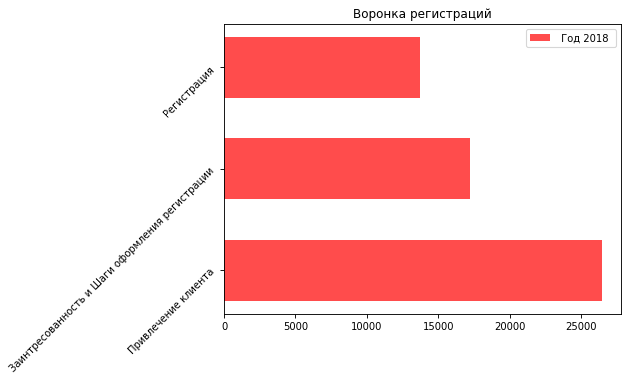

In [84]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import csv

data_names = ['Привлечение клиента', 'Заинтресованность и Шаги оформления регистрации', 'Регистрация']
data_values = [newtraf, newtraf*((ex+otk)/2), newregistr]

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384/ dpi) )
mpl.rcParams.update({'font.size': 9})

plt.title('Воронка регистраций')

ax.xaxis.grid(True, zorder = 1)

xs = range(len(data_names))

plt.barh([x for x in xs], [ d for d in data_values],
         height = 0.6, color = 'red', alpha = 0.7, label = ' Год 2018 ',
         zorder = 2)
plt.yticks(xs, data_names,rotation=45)

plt.legend(loc='upper right')

# Пояснение к графику на текущий год
Я подсчитал количество всего трафика по всем ресурсам 26458,затем я нашел  общее среднее между показателями отказов и выходов пользователей,умножил это значение на наш трафик и получил таблицу "Заинтресованность и Шаги оформления регистрации".Из полученных значений можно сделать вывод что конверсия от привлечения клиента до его заинтересованности примерно 65%,дальше я подсчитал сумму всех зарегистрировавшихся новых участников 13742, с помощью этого можно подсчитать конверсию от  "Заинтресованность и Шаги оформления регистрации" до непосредвственно регистрации,она примерно равна 85%


# Совет для увеличения на 15тыс регистрации на будующий год
Так как наша воронка даёт приблезительно 14тыс регистрации,для получения 15тыс нужно или увеличивать привлечение клиентов(желательно тех каналов у которых большая конверсия,по нашим данным это реферальные переходы,платные размещения,посты в пабликах вузов и в первую очерь таргетинг и инстаграм ) или увелчить процентное соотношения заинересованости и упростить шаги регистрации.